In [3]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as pl

In [4]:
d = pd.read_csv("GSS.2006.csv")
d.head()

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question 1
Choose one variable, look at its distribution, and plot a histogram of it.  Explain what you take away from looking at the variable.

In [5]:
d.wrkstat.value_counts()

1.0    2322
5.0     715
7.0     496
2.0     440
8.0     155
4.0     148
6.0     140
3.0      90
Name: wrkstat, dtype: int64

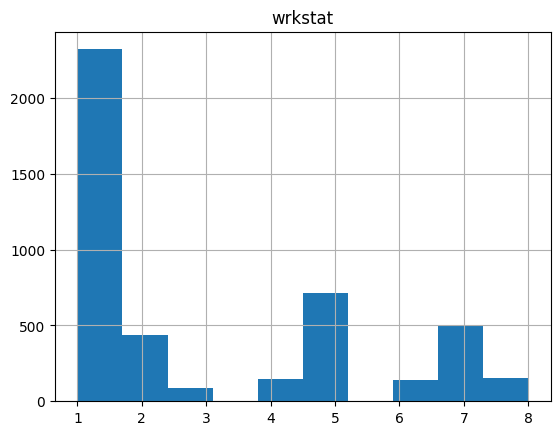

In [13]:
d.hist(column='wrkstat')
pl.show()

### Answer 1
I chose to look at a variable that investigates respondents' labor force status.  This variable, wrkstat​, has 8 categories in total: 1--Working full-time; 2--Working part-time; 3--With a job, but not at work because of temporary illness, vacation, strike; 4--Unemployed, laid off, looking for work; 5--Retired; 6--In school; 7--Keeping house; 8--Other.

The histogram above shows the distribution of this variable. What we can see here is that respondents working full-time are significantly more than other respondents, specifically 2322 people. Following are those who are retired, keeping house, and part-time workers.


### Question 2
Choose some continuous-ish variables, and calculate their mean and standard deviation by some grouping variables.  Explain what conclusion you draw from this analysis.

In [7]:
d.groupby(['race'])['chldidel'].mean()

race
1    3.068892
2    3.397112
3    3.086466
Name: chldidel, dtype: float64

In [8]:
d.groupby(['race'])['chldidel'].std()

race
1    1.937605
2    1.994846
3    1.649484
Name: chldidel, dtype: float64

In [9]:
d.groupby(['coneduc'])['rincom06'].mean()

coneduc
1.0    12.795139
2.0    14.789552
3.0    15.335106
Name: rincom06, dtype: float64

In [10]:
d.groupby(['coneduc'])['rincom06'].std()


coneduc
1.0    6.027496
2.0    5.575320
3.0    5.747768
Name: rincom06, dtype: float64

### Answer 2
For the first continuous-ish variable, I chose to look at chldidel​, which investigates how many children the respondents wanted to have. And I grouped it by race, with labels 1--White, 2--Black, and 3--Others.

I chose to look at differences in mean and standard deviation of chldidel by race because I thought there might be some cultural influences over people's ideal number of children. Through looking at those differences, we can find that black people prefered to have more children (3.40 on average), and white people prefered fewer children (3.07 on average). But shown by the standard deviation, both of them are more variable considering the ideal number of children compared to other races.

Then I chose the second continuous-ish variable, rincom06​. It shows the income of respondents. This time I grouped the variable by coneduc, which investigates how confident the respondents were toward their education. It has 3 levels: 1--A great deal; 2--Only some; 3--Hardly any.

I looked at differences in mean and standard deviation of rincom06 by coneduc as I believed people who think they have a high level of education are more likely to have received higher education, and people who have received higher education are more likely to have higher incomes. However, the result shows an interesting thing: people who thought they had a high level of education were actually at the lowest income level (12.80 on average) compared to the other 2 groups, and people who thought they had barely been educated had the highest income (15.34 on average).

There are several possible reasons: 1. People's perception of their own education level may not always align with their actual educational attainment; 2. Income is influenced by various factors beyond education, including occupation, experience, industry, geographic location, and more; 3. The dataset I was working with may not be representative of the larger population.

### Question 3
Choose two categorical-ish variables, and cross-tabulate them.  Explain what conclusion you draw from this analysis.

In [11]:
res = pd.crosstab(d.workdiff, d.wktopsat)
res.astype('float').div(res.sum(axis=0), axis=1)

wktopsat,1.0,2.0,3.0,4.0
workdiff,,,,
1.0,0.747475,0.503876,0.367470,0.384224
2.0,0.202020,0.418605,0.513253,0.424936
3.0,0.010101,0.069767,0.113253,0.167939
4.0,0.040404,0.007752,0.006024,0.022901


### Answer 3
Two categorical-ish variables I chose to look at are workdiff and wktopsat. workdiff shows whether a respondent did numerous different things on the job, and wktopsat illustrates to what degree a respondent's main satisfaction came from work. Both of them are divided into 4 levels: 1--Strong agree; 2--Agree; 3--Disagree; 4--Strong disagree.

After I cross-­tabulated them in Table 2, I found that respondents who had the most different things to do on the job were most satisfied with their job. Among the respondents who indicated agreement (rather than strong agreement) that their primary source of satisfaction derived from their work, there was a notably higher proportion within the subgroup characterized by the highest degree of work diversity, as opposed to individuals with differing levels of work diversity. Respondents who had comparatively less different work show an increasing proportion as the level of satisfaction decreases. And among those who had the least different work, most people were most satisfied to work, followed by those who were not that satisfied by work.

Overall, the more diverse the work content, the less likely people would get bored day in and day out. New challenges tended to bring interest and satisfaction in work. At the same time, the more monotonous the work content, the easier it was for people to feel bored and tired, and thus not that satisfied with work. However, there were some people who liked to do the same work repeatedly.
